# Attention Is All You Need Implementation

**Source:** https://nlp.seas.harvard.edu/2018/04/03/attention.html

Importing Libraries

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Image
seaborn.set_context(context="talk")
%matplotlib inline

**Utils**

In [16]:
def clones(module, N):
    return nn.ModuleLost([copy.deepcopy(module) for _ in range(N)])

**Model Architecture**

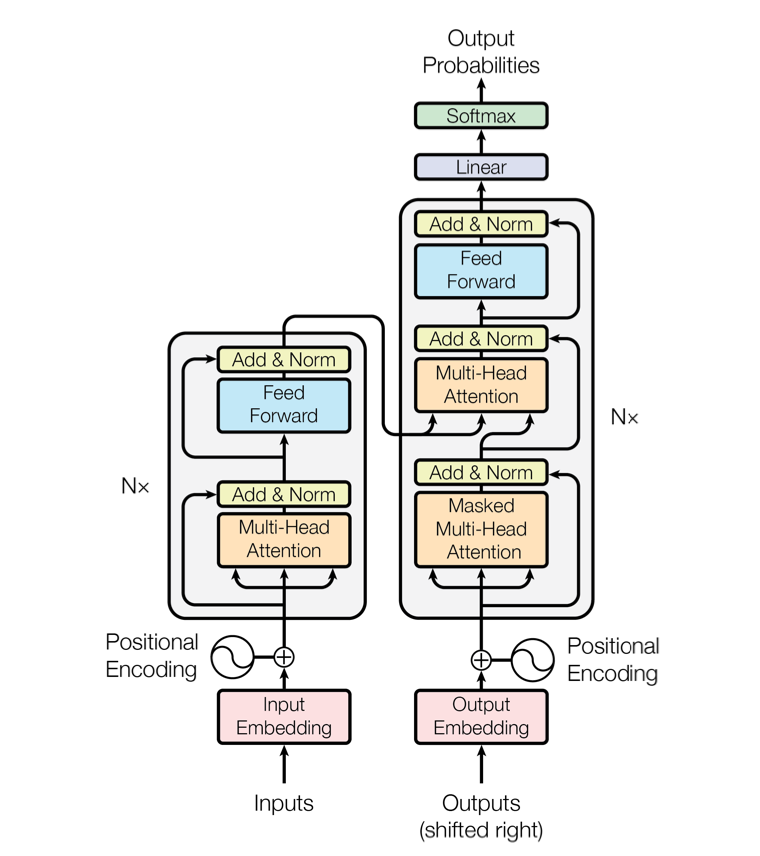

In [11]:
Image(filename='architecture.png',width=400)

In [14]:
class EncoderDecoder(nn.Module):
    
    def __init(self, encoder, decoder, src_embed, tgt_embd, generator):
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embd
        self.generator = generator

    def forward(self, src, tgt, src_mask, tgt_mask):
        encoded = self.encode(src, src_mask)
        decoded = self.decoded()
    
    def encode(self, src, src_mask):
        return self.encoder(self.src_embed(src), src_mask)

    def decode(self, memory, src_mask, tgt, tgt_mask):
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)    

# Encoder

**LayerNorm**

In [24]:
class LayerNorm(nn.Module):

    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))        
        self.b_2 = nn.Parameter(torch.zeros(features))        
        self.eps = eps
    
    def forward(self, x):
        x_mean = x.mean(-1, keepdim=True)
        x_std = x.std(-1, keepdim=True)
        return self.a_2 * (x-x_mean)/(x_std+self.eps) + self.b_2

In [26]:
class SublayerConnection(nn.Module):
    
    def __init__(self, size, dropout):
        super(SublayerConnection,self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        return x + self.dropout(sublayer(self.norm(x)))

In [27]:
class Encoder(nn.Module):

    def __init__(self, layer, N):
        super(Encoder, self).__init__()
        self.layers =  clones(layer,N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, mask):
        for layer in self.layers:
            x = layer(x,mask)

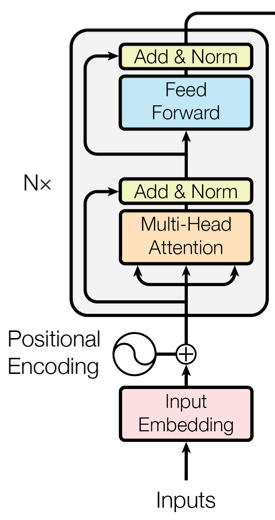

In [28]:
Image(filename='encoder_architecture.png',width=200)

In [30]:
class EncoderLayer(nn.Module):

    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size,dropout),2)
    
    def forward(self, x, mask):
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)

# Decoder

In [32]:
class Decoder(nn.Module):

    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers =  clones(layer,N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)

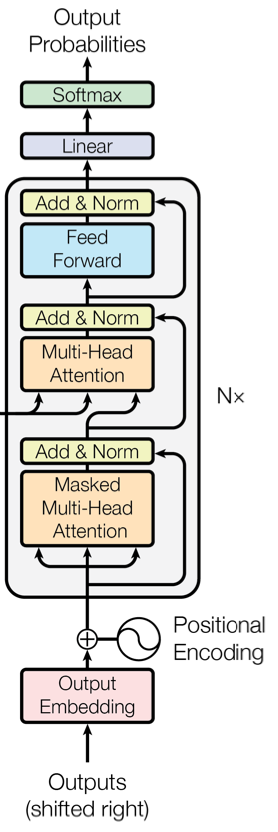

In [33]:
Image(filename='decoder_architecture.png',width=200)

In [ ]:
class DecoderLayer(nn.Module):

    def __init__(self, size, src_attn, self_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.src_attn = src_attn
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SublayerConnection(size,dropout),2)
    
    def forward(self, x, memory, src_mask, tgt_mask):
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        return self.sublayer[2](x, self.feed_forward)